Classification of the IMDB dataset (USING NEURAL NETWORKS)


The "IMDB dataset" will be used in this assignment, and the goal is to classify movie reviews as positive or negative. The Internet Movie Database provided 50,000 highly polarized reviews for this dataset. They are divided into 25,000 reviews for training and 25,000 reviews for testing, with each set consisting of 50 percent negative and 50 percent positive feedback.

In [1]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In the code, "num_words=10000" is added.In order to have a more manageable data size, we will only use the top 10,000 most common words



Decoding reviews back to text

Here, in this section we can see that integers can be decoded to reviews(Words)

In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Data Preparation

We have to change our reviews from characters into tensors. Using one-hot encoding, we could convert our lists into vectors of 0s and 1s.For instance, this would mean transforming the sequence [3, 5] into a 10,000-dimensional vector in which all indices are zeros except for three and five, which are ones.Then we could use a Dense layer as the first layer in our network, capable of handling floating point vectors The dataset is vectorized here by Create an all-zero matrix of shape (len(sequences), dimension).

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

Data Vectorization



In [4]:
from numpy.lib.function_base import vectorize
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

Label Vectorization

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

USING 2 HIDDEN LAYERS
(Using Relu activation function)

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)



Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.5342 - accuracy: 0.7673 - val_loss: 0.4066 - val_accuracy: 0.8508
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3262 - accuracy: 0.8925 - val_loss: 0.3337 - val_accuracy: 0.8701
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2452 - accuracy: 0.9183 - val_loss: 0.2826 - val_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1961 - accuracy: 0.9338 - val_loss: 0.2991 - val_accuracy: 0.8801
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1656 - accuracy: 0.9451 - val_loss: 0.2924 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1405 - accuracy: 0.9549 - val_loss: 0.2832 - val_accuracy: 0.8882
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1206 - accuracy: 0.9618 - val_loss: 0.2979 - val_accuracy: 0.8852
Epoch 8/20
30

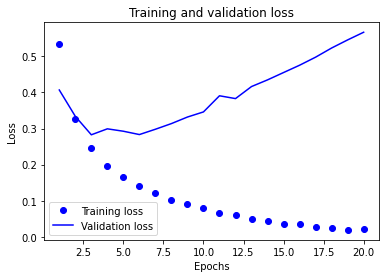

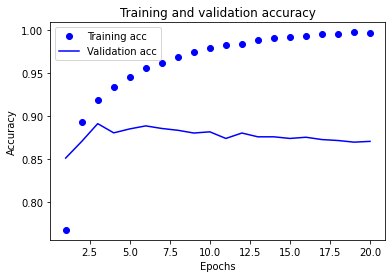

In [7]:
import matplotlib.pyplot as plt

# Get the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



USING ONE HIDDEN LAYER

In [8]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)



Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.5099 - accuracy: 0.7857 - val_loss: 0.3984 - val_accuracy: 0.8640
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3289 - accuracy: 0.8962 - val_loss: 0.3260 - val_accuracy: 0.8828
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2623 - accuracy: 0.9154 - val_loss: 0.2950 - val_accuracy: 0.8873
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2208 - accuracy: 0.9299 - val_loss: 0.2812 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1932 - accuracy: 0.9382 - val_loss: 0.2782 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1718 - accuracy: 0.9455 - val_loss: 0.2833 - val_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1559 - accuracy: 0.9510 - val_loss: 0.2922 - val_accuracy: 0.8810
Epoch 8/20
30

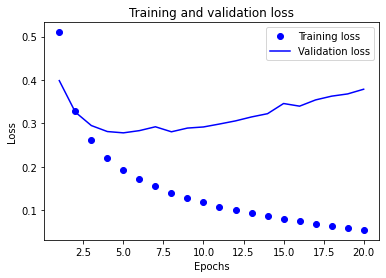

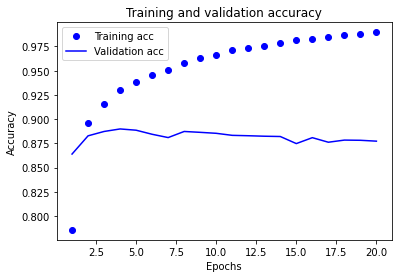

In [9]:
# Get the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

USING 3 HIDDEN LAYERS

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5657 - accuracy: 0.7439 - val_loss: 0.4274 - val_accuracy: 0.8665
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3402 - accuracy: 0.8875 - val_loss: 0.3098 - val_accuracy: 0.8877
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2407 - accuracy: 0.9168 - val_loss: 0.2791 - val_accuracy: 0.8937
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1899 - accuracy: 0.9363 - val_loss: 0.2759 - val_accuracy: 0.8932
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1563 - accuracy: 0.9460 - val_loss: 0.3017 - val_accuracy: 0.8835
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1310 - accuracy: 0.9565 - val_loss: 0.2995 - val_accuracy: 0.8868
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1072 - accuracy: 0.9650 - val_loss: 0.3327 - val_accuracy: 0.8788
Epoch 8/20
30

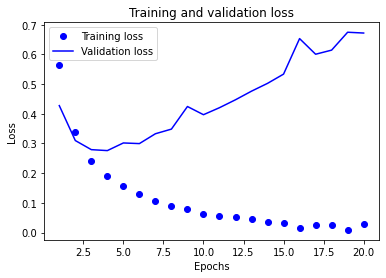

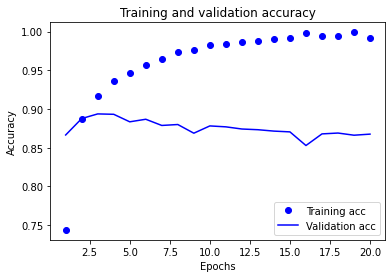

In [11]:
# Get the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

USING DIFFERENT HIDDEN UNITS

USING 32 HIDDEN UNITS

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

model32 = models.Sequential()
model32.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model32.add(layers.Dense(1, activation='sigmoid'))

model32.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history32 = model32.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))



Epoch 1/20
49/49 [==============================] - 4s 59ms/step - loss: 0.4552 - accuracy: 0.8180 - val_loss: 0.3464 - val_accuracy: 0.8776
Epoch 2/20
49/49 [==============================] - 2s 31ms/step - loss: 0.2856 - accuracy: 0.9000 - val_loss: 0.2981 - val_accuracy: 0.8845
Epoch 3/20
49/49 [==============================] - 1s 30ms/step - loss: 0.2332 - accuracy: 0.9159 - val_loss: 0.2977 - val_accuracy: 0.8801
Epoch 4/20
49/49 [==============================] - 2s 31ms/step - loss: 0.2046 - accuracy: 0.9266 - val_loss: 0.2809 - val_accuracy: 0.8862
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1832 - accuracy: 0.9362 - val_loss: 0.2806 - val_accuracy: 0.8870
Epoch 6/20
49/49 [==============================] - 1s 30ms/step - loss: 0.1685 - accuracy: 0.9414 - val_loss: 0.2862 - val_accuracy: 0.8863
Epoch 7/20
49/49 [==============================] - 1s 30ms/step - loss: 0.1566 - accuracy: 0.9463 - val_loss: 0.2945 - val_accuracy: 0.8828
Epoch 8/20
49

USING 64 HIDDEN UNITS

In [13]:
model64 = models.Sequential()
model64.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model64.add(layers.Dense(1, activation='sigmoid'))

model64.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history64 = model64.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))


Epoch 1/20
49/49 [==============================] - 4s 69ms/step - loss: 0.4338 - accuracy: 0.8189 - val_loss: 0.3424 - val_accuracy: 0.8655
Epoch 2/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2720 - accuracy: 0.8988 - val_loss: 0.3390 - val_accuracy: 0.8572
Epoch 3/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2235 - accuracy: 0.9168 - val_loss: 0.3036 - val_accuracy: 0.8749
Epoch 4/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2014 - accuracy: 0.9253 - val_loss: 0.2787 - val_accuracy: 0.8873
Epoch 5/20
49/49 [==============================] - 3s 61ms/step - loss: 0.1790 - accuracy: 0.9348 - val_loss: 0.2844 - val_accuracy: 0.8868
Epoch 6/20
49/49 [==============================] - 2s 42ms/step - loss: 0.1650 - accuracy: 0.9402 - val_loss: 0.2934 - val_accuracy: 0.8839
Epoch 7/20
49/49 [==============================] - 2s 42ms/step - loss: 0.1541 - accuracy: 0.9445 - val_loss: 0.3001 - val_accuracy: 0.8819
Epoch 8/20
49

USING 128 HIDDEN UNITS

In [14]:
model128 = models.Sequential()
model128.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model128.add(layers.Dense(1, activation='sigmoid'))

model128.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history128 = model128.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))


Epoch 1/20
49/49 [==============================] - 5s 88ms/step - loss: 0.4330 - accuracy: 0.8139 - val_loss: 0.3143 - val_accuracy: 0.8841
Epoch 2/20
49/49 [==============================] - 3s 59ms/step - loss: 0.2737 - accuracy: 0.8979 - val_loss: 0.2900 - val_accuracy: 0.8850
Epoch 3/20
49/49 [==============================] - 3s 68ms/step - loss: 0.2306 - accuracy: 0.9112 - val_loss: 0.2800 - val_accuracy: 0.8863
Epoch 4/20
49/49 [==============================] - 3s 63ms/step - loss: 0.1988 - accuracy: 0.9262 - val_loss: 0.3228 - val_accuracy: 0.8662
Epoch 5/20
49/49 [==============================] - 3s 59ms/step - loss: 0.1831 - accuracy: 0.9303 - val_loss: 0.2855 - val_accuracy: 0.8859
Epoch 6/20
49/49 [==============================] - 3s 67ms/step - loss: 0.1653 - accuracy: 0.9380 - val_loss: 0.2912 - val_accuracy: 0.8837
Epoch 7/20
49/49 [==============================] - 3s 66ms/step - loss: 0.1497 - accuracy: 0.9448 - val_loss: 0.3448 - val_accuracy: 0.8650
Epoch 8/20
49

In [15]:
model256 = models.Sequential()
model256.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model256.add(layers.Dense(1, activation='sigmoid'))

model256.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history256 = model256.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 7s 123ms/step - loss: 0.4437 - accuracy: 0.8027 - val_loss: 0.3284 - val_accuracy: 0.8680
Epoch 2/20
49/49 [==============================] - 5s 108ms/step - loss: 0.2755 - accuracy: 0.8918 - val_loss: 0.3509 - val_accuracy: 0.8506
Epoch 3/20
49/49 [==============================] - 5s 97ms/step - loss: 0.2280 - accuracy: 0.9111 - val_loss: 0.2905 - val_accuracy: 0.8807
Epoch 4/20
49/49 [==============================] - 6s 121ms/step - loss: 0.2020 - accuracy: 0.9206 - val_loss: 0.2902 - val_accuracy: 0.8815
Epoch 5/20
49/49 [==============================] - 5s 97ms/step - loss: 0.1822 - accuracy: 0.9309 - val_loss: 0.2834 - val_accuracy: 0.8837
Epoch 6/20
49/49 [==============================] - 5s 98ms/step - loss: 0.1567 - accuracy: 0.9392 - val_loss: 0.2956 - val_accuracy: 0.8804
Epoch 7/20
49/49 [==============================] - 5s 109ms/step - loss: 0.1419 - accuracy: 0.9474 - val_loss: 0.2953 - val_accuracy: 0.8829
Epoch 8/2

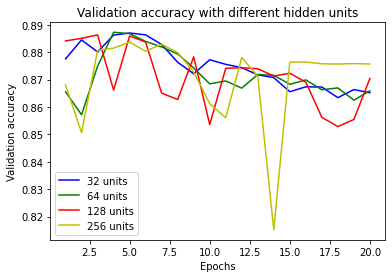

In [16]:
import matplotlib.pyplot as plt

epochs = range(1, 21)

plt.plot(epochs, history32.history['val_accuracy'], 'b', label='32 units')
plt.plot(epochs, history64.history['val_accuracy'], 'g', label='64 units')
plt.plot(epochs, history128.history['val_accuracy'], 'r', label='128 units')
plt.plot(epochs, history256.history['val_accuracy'], 'y', label='256 units')
plt.title('Validation accuracy with different hidden units')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.legend()

plt.show()


Try using the mse loss function instead of binary_crossentropy.  

In [17]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.1863 - accuracy: 0.7593 - val_loss: 0.1424 - val_accuracy: 0.8241
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1078 - accuracy: 0.8814 - val_loss: 0.1013 - val_accuracy: 0.8775
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0775 - accuracy: 0.9127 - val_loss: 0.0955 - val_accuracy: 0.8767
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0641 - accuracy: 0.9277 - val_loss: 0.0934 - val_accuracy: 0.8729
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0545 - accuracy: 0.9379 - val_loss: 0.0854 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0466 - accuracy: 0.9504 - val_loss: 0.0865 - val_accuracy: 0.8828
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0421 - accuracy: 0.9544 - val_loss: 0.0835 - val_accuracy: 0.8884
Epoch 8/20
30

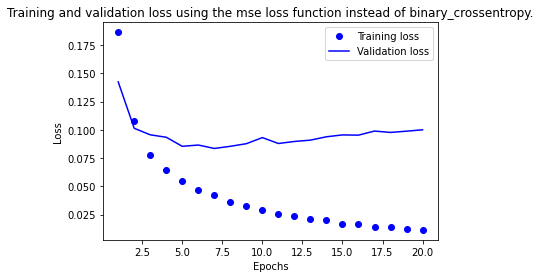

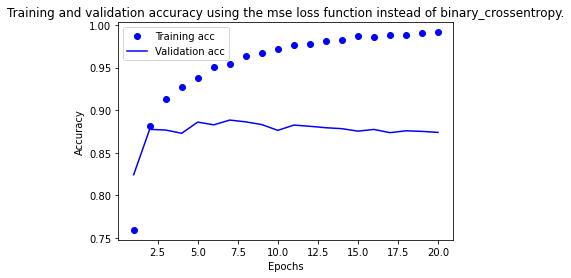

In [18]:
# Get the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss using the mse loss function instead of binary_crossentropy.')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy using the mse loss function instead of binary_crossentropy.')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Try using the tanh activation (an activation that was popular in the early days of neural 
networks) instead of relu. 

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.4955 - accuracy: 0.7916 - val_loss: 0.3672 - val_accuracy: 0.8712
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2936 - accuracy: 0.8999 - val_loss: 0.2954 - val_accuracy: 0.8864
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2155 - accuracy: 0.9246 - val_loss: 0.3000 - val_accuracy: 0.8751
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1673 - accuracy: 0.9427 - val_loss: 0.2743 - val_accuracy: 0.8901
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1361 - accuracy: 0.9533 - val_loss: 0.2937 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1145 - accuracy: 0.9610 - val_loss: 0.3292 - val_accuracy: 0.8815
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0902 - accuracy: 0.9708 - val_loss: 0.3536 - val_accuracy: 0.8804
Epoch 8/20
30

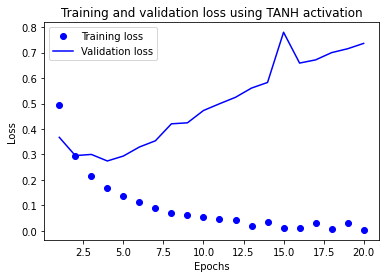

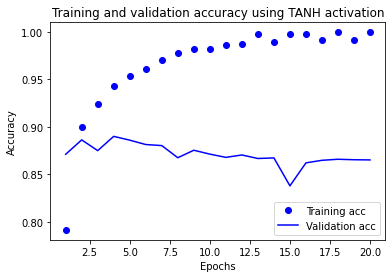

In [20]:
# Get the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss using TANH activation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy using TANH activation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Use any technique we studied in class, and these include regularization, dropout, etc., to 
get your model to perform better on validation. 

Using the Adam optimizer:

Epoch 1/20
49/49 [==============================] - 4s 65ms/step - loss: 0.4754 - accuracy: 0.8129 - val_loss: 0.3255 - val_accuracy: 0.8798
Epoch 2/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2419 - accuracy: 0.9149 - val_loss: 0.2820 - val_accuracy: 0.8886
Epoch 3/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1798 - accuracy: 0.9375 - val_loss: 0.2909 - val_accuracy: 0.8843
Epoch 4/20
49/49 [==============================] - 1s 30ms/step - loss: 0.1449 - accuracy: 0.9524 - val_loss: 0.3103 - val_accuracy: 0.8803
Epoch 5/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1198 - accuracy: 0.9617 - val_loss: 0.3420 - val_accuracy: 0.8731
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1013 - accuracy: 0.9675 - val_loss: 0.3726 - val_accuracy: 0.8693
Epoch 7/20
49/49 [==============================] - 1s 30ms/step - loss: 0.0835 - accuracy: 0.9751 - val_loss: 0.4143 - val_accuracy: 0.8632
Epoch 8/20
49

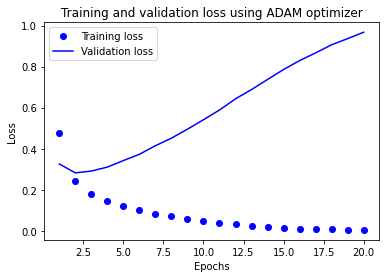

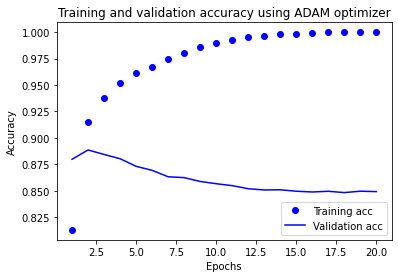

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss using ADAM optimizer")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

plt.figure()
plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy using ADAM optimizer")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



Using the L1 regularization:


In [22]:
from tensorflow.keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))




Epoch 1/20
49/49 [==============================] - 4s 55ms/step - loss: 0.9577 - accuracy: 0.7805 - val_loss: 0.6508 - val_accuracy: 0.8436
Epoch 2/20
49/49 [==============================] - 1s 25ms/step - loss: 0.6088 - accuracy: 0.8544 - val_loss: 0.5776 - val_accuracy: 0.8630
Epoch 3/20
49/49 [==============================] - 1s 25ms/step - loss: 0.5679 - accuracy: 0.8582 - val_loss: 0.5645 - val_accuracy: 0.8586
Epoch 4/20
49/49 [==============================] - 2s 32ms/step - loss: 0.5432 - accuracy: 0.8659 - val_loss: 0.5349 - val_accuracy: 0.8681
Epoch 5/20
49/49 [==============================] - 2s 34ms/step - loss: 0.5280 - accuracy: 0.8678 - val_loss: 0.5450 - val_accuracy: 0.8569
Epoch 6/20
49/49 [==============================] - 1s 30ms/step - loss: 0.5151 - accuracy: 0.8723 - val_loss: 0.5873 - val_accuracy: 0.8312
Epoch 7/20
49/49 [==============================] - 1s 30ms/step - loss: 0.5092 - accuracy: 0.8732 - val_loss: 0.5107 - val_accuracy: 0.8712
Epoch 8/20
49

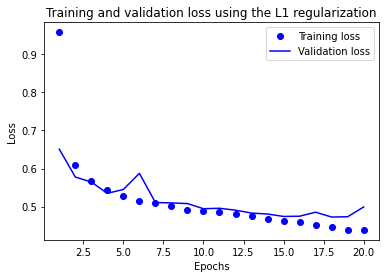

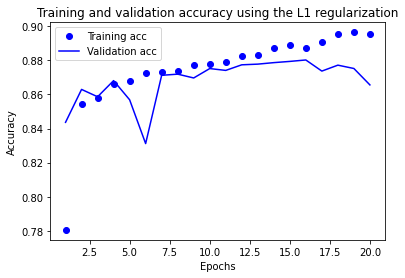

In [23]:

history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss using the L1 regularization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()

acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy using the L1 regularization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Using dropout:


In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))




Epoch 1/20
49/49 [==============================] - 4s 60ms/step - loss: 0.6234 - accuracy: 0.6474 - val_loss: 0.5057 - val_accuracy: 0.8509
Epoch 2/20
49/49 [==============================] - 1s 25ms/step - loss: 0.4778 - accuracy: 0.7900 - val_loss: 0.3679 - val_accuracy: 0.8740
Epoch 3/20
49/49 [==============================] - 1s 26ms/step - loss: 0.3858 - accuracy: 0.8418 - val_loss: 0.3134 - val_accuracy: 0.8825
Epoch 4/20
49/49 [==============================] - 1s 24ms/step - loss: 0.3306 - accuracy: 0.8756 - val_loss: 0.2822 - val_accuracy: 0.8892
Epoch 5/20
49/49 [==============================] - 1s 31ms/step - loss: 0.2830 - accuracy: 0.8953 - val_loss: 0.2739 - val_accuracy: 0.8906
Epoch 6/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2505 - accuracy: 0.9099 - val_loss: 0.2784 - val_accuracy: 0.8894
Epoch 7/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2216 - accuracy: 0.9213 - val_loss: 0.2994 - val_accuracy: 0.8859
Epoch 8/20
49

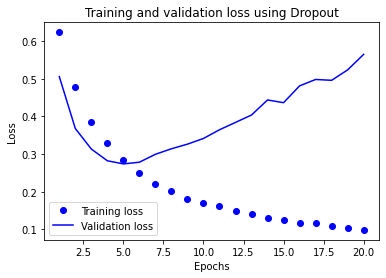

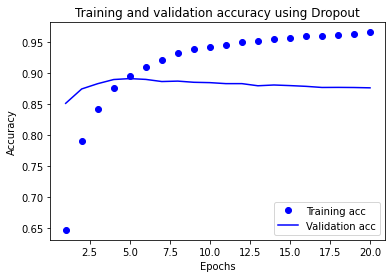

In [25]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss using Dropout")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()

acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy using Dropout")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Using early stopping:


In [26]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience=2)

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])


Epoch 1/20
49/49 [==============================] - 4s 60ms/step - loss: 0.4556 - accuracy: 0.8134 - val_loss: 0.3390 - val_accuracy: 0.8765
Epoch 2/20
49/49 [==============================] - 1s 30ms/step - loss: 0.2698 - accuracy: 0.9025 - val_loss: 0.2843 - val_accuracy: 0.8892
Epoch 3/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2126 - accuracy: 0.9245 - val_loss: 0.2875 - val_accuracy: 0.8842
Epoch 4/20
49/49 [==============================] - 1s 30ms/step - loss: 0.1819 - accuracy: 0.9340 - val_loss: 0.2910 - val_accuracy: 0.8844


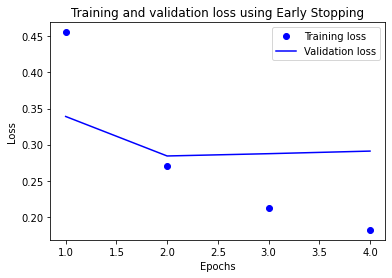

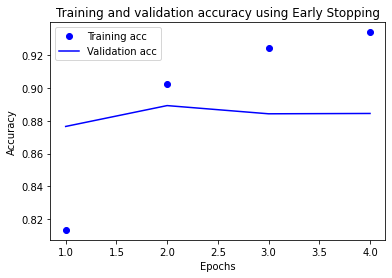

In [27]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss using Early Stopping")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()

acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy using Early Stopping")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
